In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from cleanlab.classification import CleanLearning
from cleanlab.filter import find_label_issues
import tensorflow as tf
import os

# 데이터 전처리

In [62]:
# CIFAR-10 데이터 로드 및 전처리
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [63]:
# nomalization
X_train, X_val = x_train.astype('float32') / 255.0, x_test.astype('float32') / 255.0 # 정규화(스케일링) 0 - 255 값을 0 - 1 사이로 변경

# 레이블 인코딩 (Label Encoding)
y_train, y_val = to_categorical(y_train, 10), to_categorical(y_test, 10)

# 라벨 오류 제거
labelerrors.com
잘못된 라벨 22개 확인 후 제거(수동)

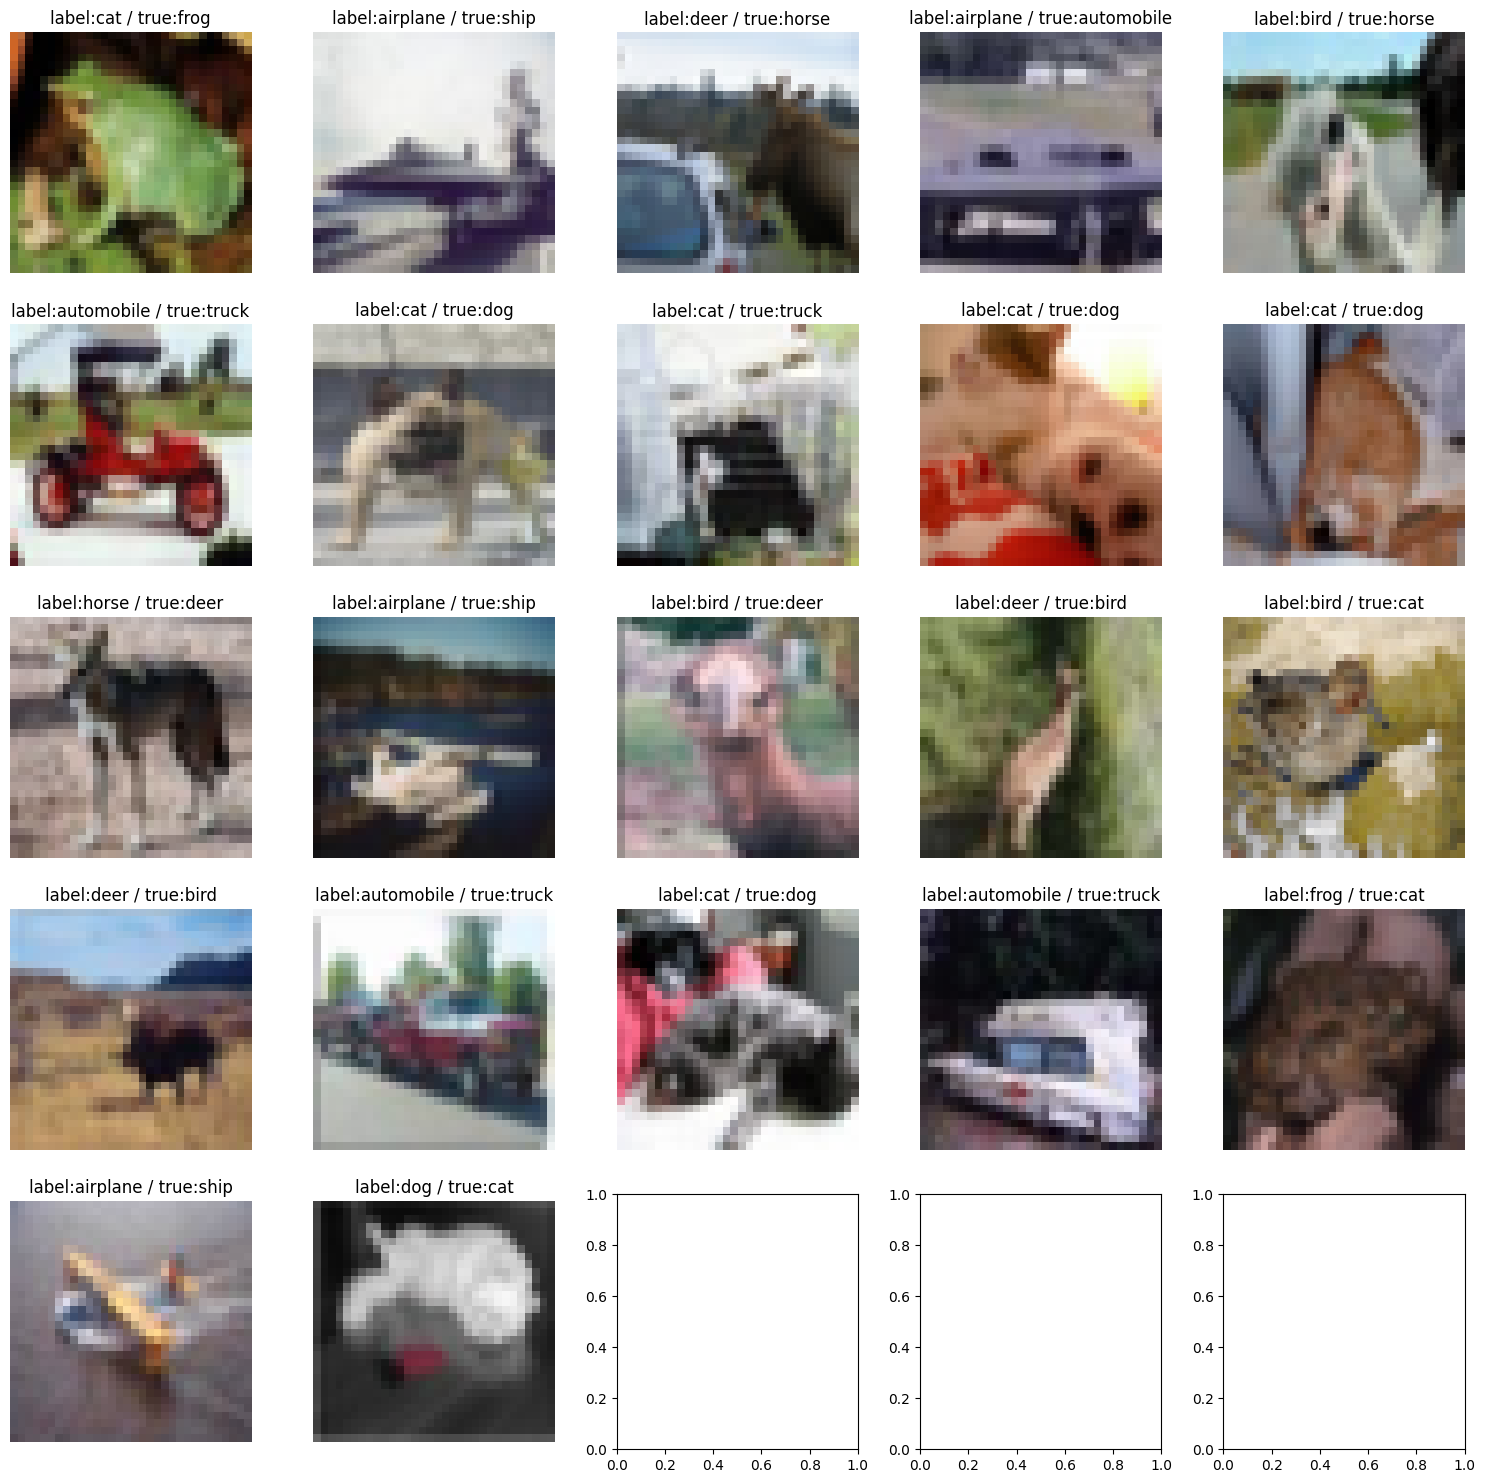

(22, 22, None)

In [49]:
# 훈련 데이터셋에서 이미지 확인
def show_images_grid(x, y, target, n_rows=5, n_cols=5):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*3, n_rows*3))
    count = 0
    for i in range(n_rows):
        for j in range(n_cols):
            index = target[count]
            if index < len(x):
                ax = axes[i, j]
                ax.imshow(x[index])
                ax.set_title(f"label:{data[y[index][0]]} / true:{right_target[count]}")
                ax.axis('off')
            else:
                axes[i, j].axis('off')
            count = count + 1
            if count == len(target):
                break
    
    plt.tight_layout()
    plt.show()

data = {
    0:'airplane',
    1:'automobile',
    2:'bird',
    3:'cat',
    4:'deer',
    5:'dog',
    6:'frog',
    7:'horse',
    8:'ship',
    9:'truck'
}

# 확인하고 싶은 이미지의 인덱스
target = [2405, 6877, 8058, 2532, 7657, 1969, 2804, 6792, 1227, 5191, 5690, 1718, 2592, 4794, 5960, 165, 9227, 5632, 9352, 7846, 6966, 5468]
right_target = ['frog', 'ship', 'horse', 'automobile', 'horse', 'truck', 'dog', 'truck', 'dog', 'dog', 'deer', 'ship', 'deer', 'bird', 'cat', 'bird', 'truck', 'dog', 'truck', 'cat', 'ship', 'cat' ]

len(target), len(right_target), show_images_grid(x_test, y_test, target)

전처리 진행 잘못된 라벨 수정

In [50]:
# 전처리 진행 잘못된 라벨 수정

# 확인하고 싶은 이미지의 인덱스
target = [2405, 6877, 8058, 2532, 7657, 1969, 2804, 6792, 1227, 5191, 5690, 1718, 2592, 4794, 5960, 165, 9227, 5632, 9352, 7846, 6966, 5468]
right_target = ['frog', 'ship', 'horse', 'automobile', 'horse', 'truck', 'dog', 'truck', 'dog', 'dog', 'deer', 'ship', 'deer', 'bird', 'cat', 'bird', 'truck', 'dog', 'truck', 'cat', 'ship', 'cat' ]
reversed_data = {value: key for key, value in data.items()}

len(target), len(right_target), x_test, y_test, target

for target, real_label in zip(target, right_target):
    print("비포어",target, real_label, y_test[target], reversed_data[real_label])
    y_test[target] = reversed_data[real_label]
    print("애프터",target, real_label, y_test[target], reversed_data[real_label])

비포어 2405 frog [3] 6
애프터 2405 frog [6] 6
비포어 6877 ship [0] 8
애프터 6877 ship [8] 8
비포어 8058 horse [4] 7
애프터 8058 horse [7] 7
비포어 2532 automobile [0] 1
애프터 2532 automobile [1] 1
비포어 7657 horse [2] 7
애프터 7657 horse [7] 7
비포어 1969 truck [1] 9
애프터 1969 truck [9] 9
비포어 2804 dog [3] 5
애프터 2804 dog [5] 5
비포어 6792 truck [3] 9
애프터 6792 truck [9] 9
비포어 1227 dog [3] 5
애프터 1227 dog [5] 5
비포어 5191 dog [3] 5
애프터 5191 dog [5] 5
비포어 5690 deer [7] 4
애프터 5690 deer [4] 4
비포어 1718 ship [0] 8
애프터 1718 ship [8] 8
비포어 2592 deer [2] 4
애프터 2592 deer [4] 4
비포어 4794 bird [4] 2
애프터 4794 bird [2] 2
비포어 5960 cat [2] 3
애프터 5960 cat [3] 3
비포어 165 bird [4] 2
애프터 165 bird [2] 2
비포어 9227 truck [1] 9
애프터 9227 truck [9] 9
비포어 5632 dog [3] 5
애프터 5632 dog [5] 5
비포어 9352 truck [1] 9
애프터 9352 truck [9] 9
비포어 7846 cat [6] 3
애프터 7846 cat [3] 3
비포어 6966 ship [0] 8
애프터 6966 ship [8] 8
비포어 5468 cat [5] 3
애프터 5468 cat [3] 3


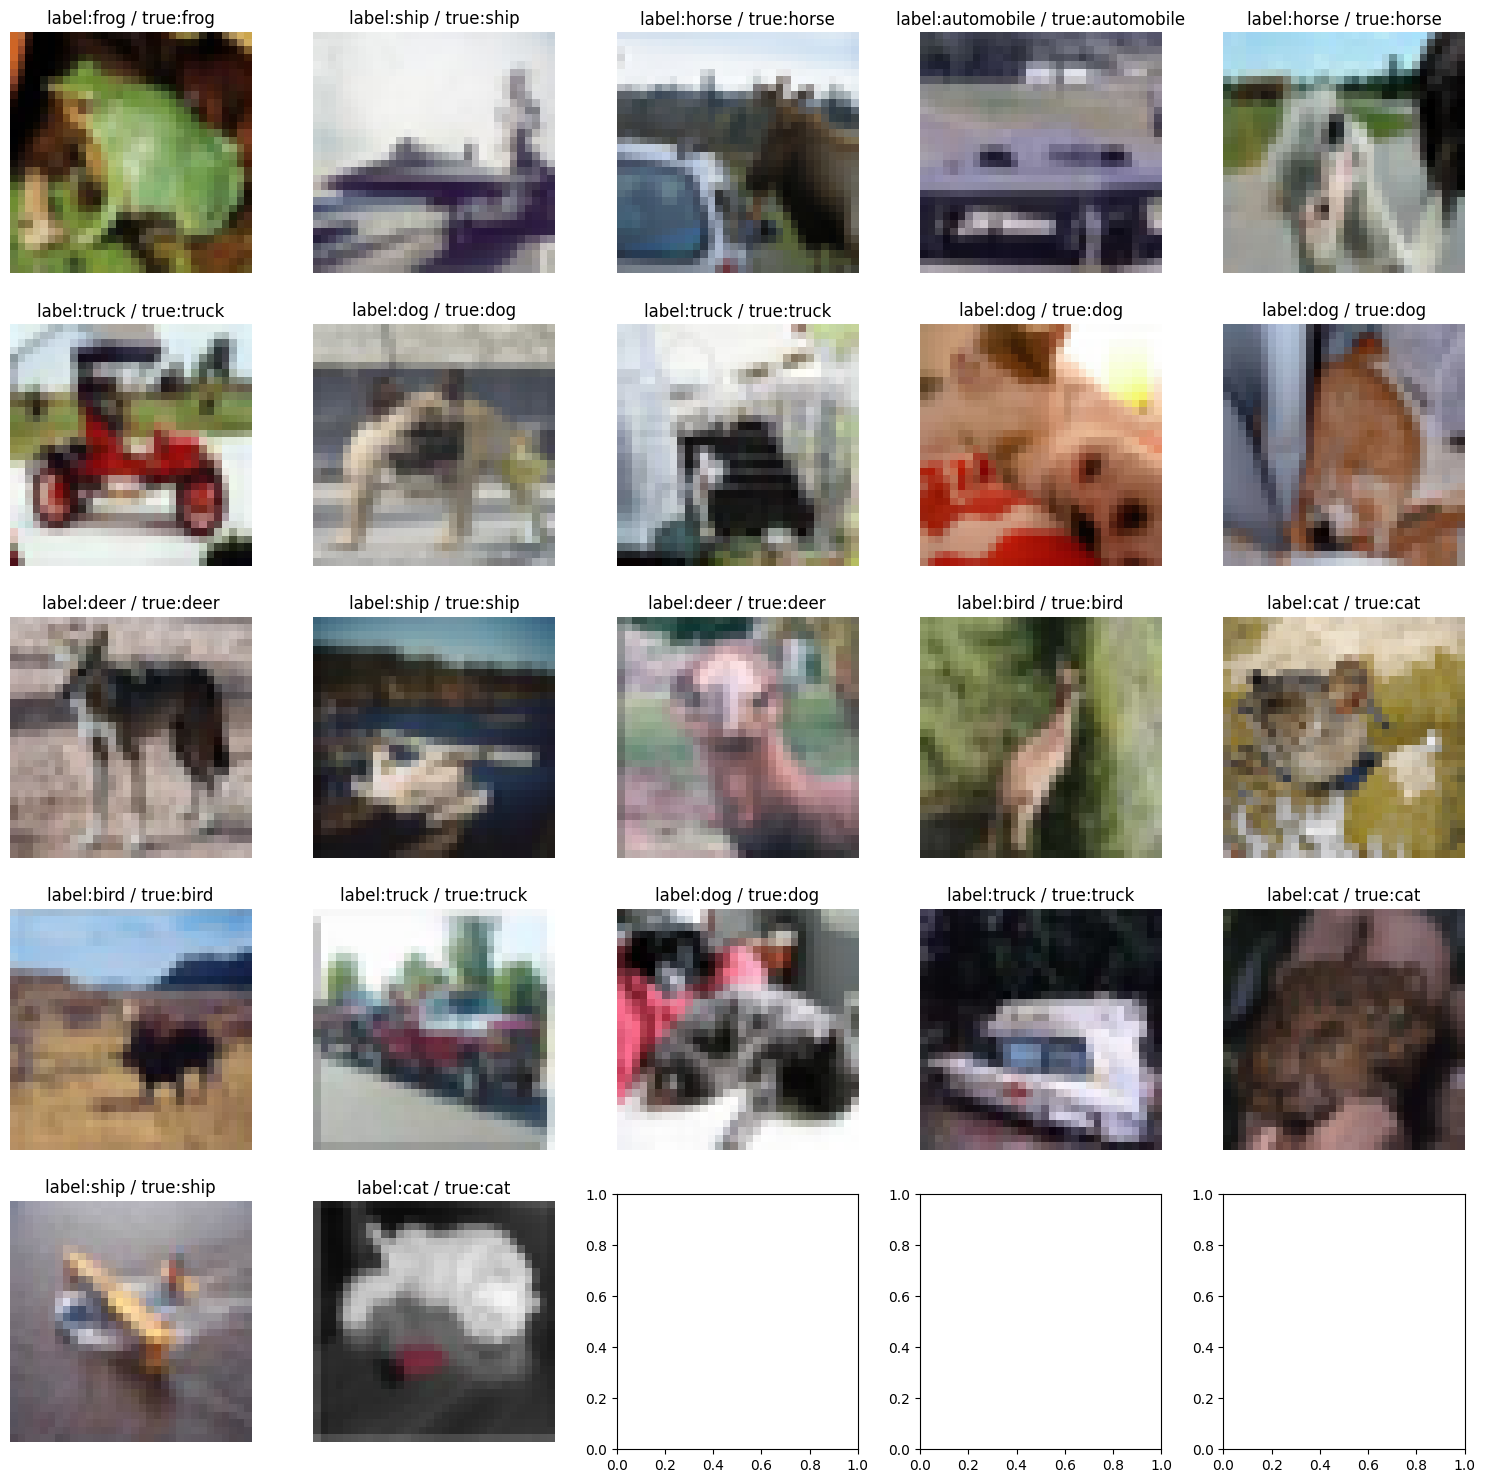

In [51]:
target = [2405, 6877, 8058, 2532, 7657, 1969, 2804, 6792, 1227, 5191, 5690, 1718, 2592, 4794, 5960, 165, 9227, 5632, 9352, 7846, 6966, 5468]
show_images_grid(x_test, y_test, target)

# 일반 모델

In [25]:
# 모델 정의
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
        AveragePooling2D((2, 2)),
        BatchNormalization(),
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        AveragePooling2D((2, 2)),
        BatchNormalization(),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [2]:
initial_model = create_model()
initial_history = initial_model.fit(x_train, to_categorical(y_train, 10), epochs=10, batch_size=64, 
                                    validation_split=0.1, verbose=1)

/home/faith/miniconda3/envs/tf2_17_0/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1724827531.763989    6618 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1724827531.779520    6618 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1724827531.779582    6618 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1724827531.781410    66

Epoch 1/10


I0000 00:00:1724827536.311023    6692 service.cc:146] XLA service 0x7f26d4006af0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724827536.311059    6692 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2024-08-28 15:45:36.343313: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-28 15:45:36.507185: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8902


 51/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2288 - loss: 2.8428

I0000 00:00:1724827538.791567    6692 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.3520 - loss: 1.9160 - val_accuracy: 0.5288 - val_loss: 1.3101
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5240 - loss: 1.3380 - val_accuracy: 0.5728 - val_loss: 1.1900
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6013 - loss: 1.1217 - val_accuracy: 0.6240 - val_loss: 1.0593
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6513 - loss: 0.9898 - val_accuracy: 0.6738 - val_loss: 0.9245
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6841 - loss: 0.8953 - val_accuracy: 0.6694 - val_loss: 0.9783
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7235 - loss: 0.7847 - val_accuracy: 0.6770 - val_loss: 0.9433
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7477 - loss: 0.7137 - val_accuracy: 0.6986 - val_loss: 0.9039
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7755 - loss: 0.6397 - val_accuracy: 0.7058 - val_

# KERAS TUNER

- 케라스 튜너 사용해서 모델 학습 

In [31]:
import tensorflow as tf
import keras
import keras_tuner as kt
from sklearn.model_selection import train_test_split
import os

In [9]:
# CIFAR-10 데이터 로드 및 전처리
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [33]:
# 전처리 진행 잘못된 라벨 수정

# 확인하고 싶은 이미지의 인덱스
target = [2405, 6877, 8058, 2532, 7657, 1969, 2804, 6792, 1227, 5191, 5690, 1718, 2592, 4794, 5960, 165, 9227, 5632, 9352, 7846, 6966, 5468]
right_target = ['frog', 'ship', 'horse', 'automobile', 'horse', 'truck', 'dog', 'truck', 'dog', 'dog', 'deer', 'ship', 'deer', 'bird', 'cat', 'bird', 'truck', 'dog', 'truck', 'cat', 'ship', 'cat' ]
data = {
    0:'airplane',
    1:'automobile',
    2:'bird',
    3:'cat',
    4:'deer',
    5:'dog',
    6:'frog',
    7:'horse',
    8:'ship',
    9:'truck'
}
reversed_data = {value: key for key, value in data.items()}

len(target), len(right_target), x_test, y_test, target

for target, real_label in zip(target, right_target):
    print("비포어",target, real_label, y_test[target], reversed_data[real_label])
    y_test[target] = reversed_data[real_label]
    print("애프터",target, real_label, y_test[target], reversed_data[real_label])

비포어 2405 frog [3] 6
애프터 2405 frog [6] 6
비포어 6877 ship [0] 8
애프터 6877 ship [8] 8
비포어 8058 horse [4] 7
애프터 8058 horse [7] 7
비포어 2532 automobile [0] 1
애프터 2532 automobile [1] 1
비포어 7657 horse [2] 7
애프터 7657 horse [7] 7
비포어 1969 truck [1] 9
애프터 1969 truck [9] 9
비포어 2804 dog [3] 5
애프터 2804 dog [5] 5
비포어 6792 truck [3] 9
애프터 6792 truck [9] 9
비포어 1227 dog [3] 5
애프터 1227 dog [5] 5
비포어 5191 dog [3] 5
애프터 5191 dog [5] 5
비포어 5690 deer [7] 4
애프터 5690 deer [4] 4
비포어 1718 ship [0] 8
애프터 1718 ship [8] 8
비포어 2592 deer [2] 4
애프터 2592 deer [4] 4
비포어 4794 bird [4] 2
애프터 4794 bird [2] 2
비포어 5960 cat [2] 3
애프터 5960 cat [3] 3
비포어 165 bird [4] 2
애프터 165 bird [2] 2
비포어 9227 truck [1] 9
애프터 9227 truck [9] 9
비포어 5632 dog [3] 5
애프터 5632 dog [5] 5
비포어 9352 truck [1] 9
애프터 9352 truck [9] 9
비포어 7846 cat [6] 3
애프터 7846 cat [3] 3
비포어 6966 ship [0] 8
애프터 6966 ship [8] 8
비포어 5468 cat [5] 3
애프터 5468 cat [3] 3


In [10]:
# nomalization
X_train, X_val = x_train.astype('float32') / 255.0, x_test.astype('float32') / 255.0 # 정규화(스케일링) 0 - 255 값을 0 - 1 사이로 변경

# 레이블 인코딩 (Label Encoding)
y_train, y_val = to_categorical(y_train, 10), to_categorical(y_test, 10)

In [35]:
import tensorflow as tf
import keras_tuner as kt

class DeepTuner(kt.Tuner):
    def run_trial(self, trial, X, y, validation_data, **fit_kwargs):
        model = self.hypermodel.build(trial.hyperparameters)
        batch_size = trial.hyperparameters.Choice('batch_size', [16, 32])
        
        history = model.fit(
            X, y, 
            batch_size=batch_size, 
            validation_data=validation_data,
            **fit_kwargs
        )
        
        # Get the best validation accuracy from the training history
        val_accuracy = max(history.history['val_accuracy'])
        
        return {'val_accuracy': val_accuracy}

def build_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(shape=x_train.shape[1:], name='inputs'))
    for i in range(hp.Int('num_layers', min_value=1, max_value=5)):
        model.add(tf.keras.layers.Conv2D(
            hp.Int(f'filters_{i}', min_value=32, max_value=128, step=32), (3, 3), activation='relu'))
    model.add(tf.keras.layers.Flatten())
    for i in range(hp.Int('n_connections', 1, 3)):
        model.add(tf.keras.layers.Dense(
            hp.Choice(f'n_nodes_{i}', values=[32, 64, 128]),
            activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax', name='outputs'))
    model.compile(optimizer='adam', loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

my_keras_tuner = DeepTuner(
    oracle=kt.oracles.BayesianOptimizationOracle(
        objective=kt.Objective('val_accuracy', 'max'), max_trials=10, seed=42),
    hypermodel=build_model,
    overwrite=True,
    project_name='my_keras_tuner')

# 해당 모델 학습시간은 약 10분정도 걸립니다!
my_keras_tuner.search(X_train, y_train, validation_data=(X_val, y_val), epochs=3)

Trial 10 Complete [00h 00m 47s]
val_accuracy: 0.6432999968528748

Best val_accuracy So Far: 0.6723999977111816
Total elapsed time: 00h 06m 53s


In [36]:
best_hps = my_keras_tuner.get_best_hyperparameters(num_trials=10)[0]
model = build_model(best_hps)
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 28, 28, 96)     │        27,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 26, 26, 128)    │       110,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,216,362 (42.79 MB)

 Trainable params: 11,216,362 (42.79 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.fit(X_train, y_train, batch_size=32, epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.4055 - loss: 1.6511
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6620 - loss: 0.9623
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7576 - loss: 0.7046
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8447 - loss: 0.4493
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9227 - loss: 0.2336
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9606 - loss: 0.1199
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9712 - loss: 0.0872
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9774 - loss: 0.0675
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9782 - loss: 0.0656
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9782 - loss: 0.0656


# 3. 모델 저장
    1) keras 방식으로 저장
    2) pb 방식으로 저장
    3) tflite 방식으로 저장

In [5]:
path = os.getenv('HOME') + '/workspace/EX07_MLOps/mymodel2.keras'
path

'/home/faith/workspace/EX07_MLOps/mymodel2.keras'

In [49]:
# 모델을 저장 - 케라스 방식
# model.save(path) 도 가능
model.save('/home/faith/workspace/EX07_MLOps/model/1/model.keras')

In [14]:
# 모델 저장하기 tf.saved_model.save() 활용
path = 'model3'
os.makedirs(path, exist_ok=True)
tf.saved_model.save(model, path)

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


In [15]:
# 모델저장하기3 - tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpzwbcqyt4/assets


INFO:tensorflow:Assets written to: /tmp/tmpzwbcqyt4/assets


Saved artifact at '/tmp/tmpzwbcqyt4'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='inputs')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  139618586693264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139618586694032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139618586695568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139618586696528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139618586696144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139618586696720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139618586698064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139618586699408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139618586698640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139618586700176: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1724918872.296874   79641 tf_tfl_flatbuffer_helpers.cc:392] Ignored output_format.
W0000 00:00:1724918872.297725   79641 tf_tfl_flatbuffer_helpers.cc:395] Ignored drop_control_dependency.
2024-08-29 17:07:52.302603: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpzwbcqyt4
2024-08-29 17:07:52.303163: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2024-08-29 17:07:52.303175: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmpzwbcqyt4
2024-08-29 17:07:52.311179: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2024-08-29 17:07:52.312777: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2024-08-29 17:07:52.423444: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmpzwbcqyt4
2024-08-29 17:07:52.432612: I tensorflow/cc/saved_model/loader.cc

# 모델 불러오기 (.tflite)

In [16]:
with open('model2.tflite', 'wb') as f:
  f.write(tflite_model)

interpreter = tf.lite.Interpreter(model_content=tflite_model)

signatures = interpreter.get_signature_list()
print(signatures)

classify_lite = interpreter.get_signature_runner('serving_default')
classify_lite

{'serving_default': {'inputs': ['inputs'], 'outputs': ['output_0']}}


# 모델 불러오기 (.keras)

In [6]:
model = tf.keras.models.load_model(path)

I0000 00:00:1724911365.375459   79641 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1724911365.556816   79641 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1724911365.556901   79641 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1724911365.559508   79641 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1724911365.559611   79641 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [7]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 28, 28, 96)     │        27,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 26, 26, 128)    │       110,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,649,088 (128.36 MB)

 Trainable params: 11,216,362 (42.79 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,432,726 (85.57 MB)

# 모델 러닝 (pb파일)
- 1. pb가 만들어진 model 폴더에서 폴더명을 '1'으로 만들고 그 안에 내용물을 넣는다.
- 2. 명령어를 입력한다. 

tensorflow_model_server --port=8500
                        --rest_api_port=8501
                        --model_name=mymodel
                        --model_base_path=/home/faith/workspace/EX07_MLOps/hello

In [11]:
a = model.predict(X_val)
a

I0000 00:00:1724911412.710370   80154 service.cc:146] XLA service 0x7efa9c0051f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724911412.710441   80154 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2024-08-29 15:03:32.717819: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-29 15:03:32.767554: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8902


 86/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

I0000 00:00:1724911413.819334   80154 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


array([[1.4095368e-04, 5.9271006e-05, 2.0261898e-06, ..., 8.7410863e-03,
        9.4820932e-02, 8.7038799e-08],
       [9.3069339e-09, 3.9988910e-03, 1.2969794e-23, ..., 1.3084339e-23,
        9.9600059e-01, 4.9884130e-07],
       [9.5369709e-01, 4.1142032e-02, 1.8803213e-08, ..., 4.2426884e-09,
        1.5662123e-03, 2.2922630e-05],
       ...,
       [2.0331415e-11, 7.7303066e-17, 1.6733315e-03, ..., 8.1063154e-06,
        1.6508451e-13, 1.1109223e-12],
       [1.5585063e-04, 9.9984407e-01, 1.4988477e-10, ..., 2.2764302e-13,
        3.1197640e-14, 4.5731308e-10],
       [6.0657971e-22, 1.2208749e-19, 4.1210498e-21, ..., 1.0000000e+00,
        1.9186537e-28, 3.9348731e-19]], dtype=float32)

In [12]:
X_val_reshaped = np.expand_dims(X_val[0], axis=0)
a = model.predict(X_val_reshaped)
a.argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step


5

In [13]:
model.export('/home/faith/workspace/EX07_MLOps/hello', format="tf_saved_model")

INFO:tensorflow:Assets written to: /home/faith/workspace/EX07_MLOps/hello/assets


INFO:tensorflow:Assets written to: /home/faith/workspace/EX07_MLOps/hello/assets


Saved artifact at '/home/faith/workspace/EX07_MLOps/hello'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='inputs')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  139618586693264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139618586694032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139618586695568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139618586696528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139618586696144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139618586696720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139618586698064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139618586699408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139618586698640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139618586700176: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
import base64
import json
import subprocess

image = x_train[0].astype('float32') / 255.0

data = json.dumps({
    "instances": [image.tolist()]
})

print(data)

# curl 명령어 준비
curl_command = [
    "curl",
    "-X", "POST",
    "http://localhost:8501/v1/models/mymodel.keras:predict",
    "-d", data
]

# curl 명령어 실행
result = subprocess.run(curl_command, capture_output=True, text=True)

# 출력 결과 확인
print(result.stdout)  # TensorFlow Serving의 응답 출력
